<a href="https://colab.research.google.com/github/sunnyskydream/ML-practice/blob/main/2_1_B_Unsupervised_Learning_Cluster_Analysis_(k_means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Similarity Measures: Euclidean Distance 
Good cluster: Inter-cluster distance is maximized and intra-cluster distance is maximized

minCostFunction:Compute ratio 
= [sum of squared distances for a given k] / [sum of squared distances to the mean of all the records (k = 1)] 

2. 
*   Strength <br/>
    Relatively efficient<br/>
    Simple implementation<br/>


*   Weakness<br/>
    Need to specify k, the number of clusters, in advance <br/>
    Unable to handle noisy data and outliers well<br/>
    Euclidian Distance(only numerical) does not work for nominal variables.<br/>

3. 
kmeans.cluster_centers_<br/>
kmeans.cluster_inertia_<br/>
kmeans.labels_<br/>
kmeans.predict(X)

In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%precision 3

'%.3f'

##Random sample 

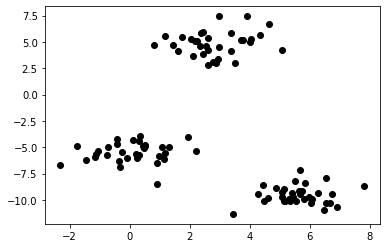

In [53]:
from sklearn.cluster import KMeans

#data generation; make_blobs with 2 vars, -10~10
from sklearn.datasets import make_blobs
X, _ = make_blobs(random_state = 10)

#plt.scatter(X[:,0], X[:,1], color = 'black')
X.shape

plt.scatter(*zip(*X), color = 'black')

In [50]:
#fit model
kmeans = KMeans(init = 'random', n_clusters = 3)
kmeans.fit(X)
kmeans.cluster_centers_
y_pred = kmeans.predict(X)
y_pred

array([[ 0.089, -5.464],
       [ 5.618, -9.543],
       [ 2.841,  4.858]])

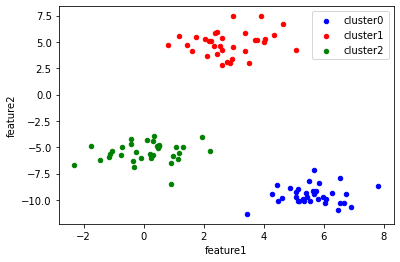

In [25]:
#merge data X and y_pred
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis = 1)
merge_data.columns = ['feature1','feature2', 'cluster']

#plot in the same ax
#https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca
ax = None
colors = ['blue', 'red','green']

for i, data in merge_data.groupby('cluster'):
  ax = data.plot.scatter(x = 'feature1', y ='feature2', color = colors[i], label = f'cluster{i}', ax = ax)

## Bank Marketing Data Cluster Analysis
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Output variable (desired target):<br/>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [30]:
#load data
import requests, zipfile
import io

zip_file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"

r = requests.get(zip_file_url, stream = True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

bank = pd.read_csv("bank-full.csv", sep = ';')
bank.head()
#bank.info()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [33]:
#data cleaning check and normalization
print('bank.shape: {}'.format(bank.shape))
print('bank is null.sum: {}'.format(bank.isnull().sum().sum()))

bank.shape: (45211, 17)
bank is null.sum: 0


In [47]:
from sklearn.preprocessing import StandardScaler

bank_sub = bank[['age', 'balance','campaign','previous']]

sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


0    14411
1    23608
2     3837
3     1373
4     1282
5      700
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

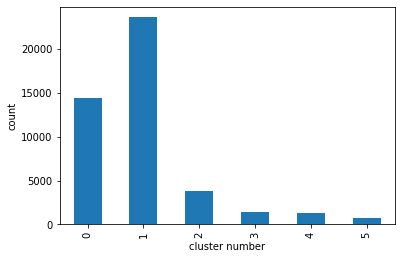

In [48]:
# fit KMeans model
kmeans = KMeans(init = 'random', n_clusters = 6, random_state=0)

kmeans.fit(bank_sub_std)

labels = pd.Series(kmeans.labels_, name='cluster_number')

print(labels.value_counts(sort=False))

ax = labels.value_counts(sort=False).plot(kind = 'bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

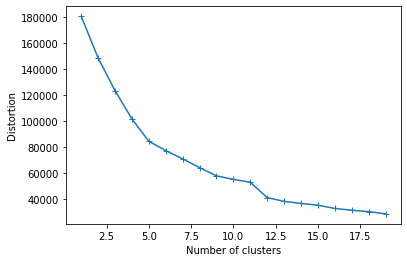

In [51]:
# distance error
dist_list = []

for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init = 'random', random_state=0)
  kmeans.fit(bank_sub_std)
  dist_list.append(kmeans.inertia_)

plt.plot(range(1,20), dist_list, marker = '+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')


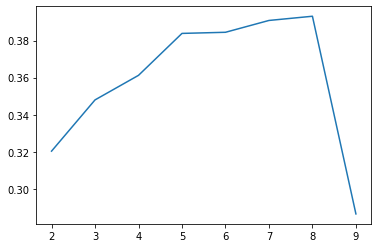

In [59]:
#Silhouette analysis 
#https://jimmy-huang.medium.com/kmeans%E5%88%86%E7%BE%A4%E6%BC%94%E7%AE%97%E6%B3%95-%E8%88%87-silhouette-%E8%BC%AA%E5%BB%93%E5%88%86%E6%9E%90-8be17e634589

from sklearn.metrics import silhouette_score

silhouette_avg = []
for i in range(2,10):# starting from 2, https://stackoverflow.com/questions/51382250/valueerror-number-of-labels-is-1-valid-values-are-2-to-n-samples-1-inclusiv
    kmeans_fit = KMeans(n_clusters = i).fit(bank_sub_std)
    silhouette_avg.append(silhouette_score(bank_sub_std, kmeans_fit.labels_))
plt.plot(range(2,10), silhouette_avg)

In [56]:
# explain
bank_with_cluster = pd.concat([bank, labels], axis = 1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


In [68]:
bins = [15,20,25,30,35,40,45,50,55,60,65,100]

qcut_age = pd.cut(bank_with_cluster.age, bins, right = False)

df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis = 1)# !!!

cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)#!!!
cross_cluster_age.head()

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,0,0,0,0,0,1023,4490,3833,3480,850,735
1,45,705,3965,8221,6731,3941,0,0,0,0,0
2,1,20,230,788,956,718,598,328,165,29,4
3,0,20,129,327,306,186,145,117,71,38,34
4,0,11,74,240,219,203,156,140,155,48,36


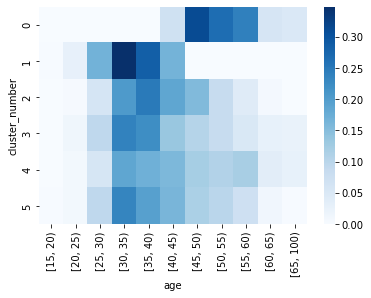

In [69]:
hist_age = pd.value_counts(qcut_age)
hist_age
sns.heatmap(cross_cluster_age.apply(lambda x:x/x.sum(), axis=1), cmap = 'Blues')#!!!

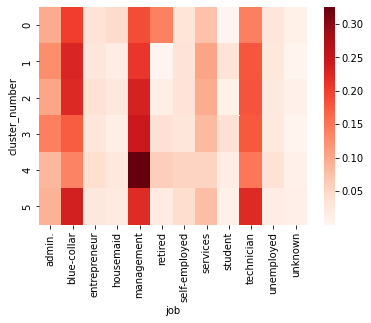

In [76]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job

sns.heatmap(cross_cluster_job.apply(lambda x:x/x.sum(),axis=1), cmap = 'Reds')